# 第1讲：RAG原理解读：让检索增强生成不再是黑盒

>文章首先介绍大模型的基础，包括定义、工作原理与挑战，逐步探讨其应用场景与局限性。接着，文章将介绍RAG技术的崛起，分析其如何通过结合外部知识库来增强大模型的能力，并详细阐述RAG的工作流程、核心组件、功能以及主要类型与变体，最后简要概述了一下后续系列教程的大纲，帮助读者对整体的知识框架有一个清晰的认知。通过这一系统化的介绍，本文为读者提供了全面的技术理解，并为未来的研究和实践奠定基础，激发对大模型与RAG领域深入探索的兴趣！
# 大模型的基本概念
最近很火的DeepSeek、GPT等模型都属于大语言模型（LLM，Large Language Model），你可以将它想象成一个拥有超强学习能力的“数字大脑”，它不仅能够“阅读”海量的书籍、文章和对话，还能从中学习如何像人类一样理解和生成语言。大模型的核心能力在于它不仅能模仿人类的语言表达，还能深入理解语言的语义、上下文和逻辑关系，甚至能够生成令人惊叹的回答或创作内容。例如，如果你给大模型提供一个故事的开头，它可以基于上下文和逻辑为你续写后续情节，且内容往往连贯且富有创意。同样，当你提出一个问题时，它能够像搜索引擎一样，从其“学习”过的知识库中提取相关信息，给出准确或富有启发性的回答【如下演示视频】。当然，大模型并非完美无缺。作为一个正在不断发展的技术，它有时可能会犯一些错误，或者对某些复杂问题的理解还不够深入。但随着技术的持续进步和数据量的不断积累，大模型的能力将不断提升，逐渐变得更加智能和可靠，更好地满足人类的需求。



[相关视频：video/豆包对话演示.mp4](video/豆包对话演示.mp4)



上面是一个大模型对话的简单示例。接下来，我将为你进一步解析大模型的基本概念和工作原理，帮助你更深入地理解这一前沿技术的魅力与潜力！

## 1. 定义与特点
- 定义

大模型是一种基于深度学习的人工智能技术，它通过在海量文本数据上进行训练，学习语言的语法规则、语义含义以及上下文关系，从而能够对自然语言进行高效建模和生成。这种能力使得大模型可以理解和生成类似人类的语言，完成诸如文本生成、问答、翻译等多种任务。
- 特点

大模型通常由数十亿甚至数万亿个参数构成，这使得模型能够捕捉语言的复杂性和细微差别。此外，大模型展现出强大的文本生成、理解和推理能力。
## 2. 大模型本质
### 生成式与判别式
在机器学习领域，模型通常分为两类：判别式模型（Discriminative Model）和生成式模型（Generative Model）。二者在目标和方法上存在本质区别，为了更直观地理解，我们可以用烹饪比赛来打个比方。  

`判别式模型：美食评委`

想象你是一位美食评委，你的任务是判断一道菜是否由顶级厨师制作。你不需要知道这道菜的具体制作过程，而是根据味道、外观和质感来评估它是否达到了顶级水平。判别式模型的工作方式类似：  
- 输入：当前这道菜的特征（如色泽、香气、口感）。  
- 输出：你的判断——它是顶级厨师做的，还是普通厨师做的。  
- 过程：你基于经验，学习如何区分“顶级菜肴”和“普通菜肴”，但不涉及如何制作菜肴的步骤。 

判别式模型的核心在于分类和预测，它善于识别模式、进行精准判断，因此在垃圾邮件检测、图像分类等任务中表现出色。但它仅关注数据的分类边界，缺乏创造性，无法独立生成新的数据。 

`生成式模型：食谱创造者`

现在，假设你是一位厨师，希望复刻顶级厨师的菜肴，甚至创造出新的美食。你不仅要分析食材和调味技巧，还需要掌握烹饪方法，以便从零开始制作出类似的菜品。其工作方式如下：  
- 输入：已有的菜肴信息（如食材、烹饪步骤、温度等）。  
- 输出：一个新的食谱，能够指导他人制作类似的顶级菜肴。  
- 过程：通过学习大量食谱和烹饪技巧，理解顶级厨师的制作方法，并据此生成新的菜品。

相比判别式模型，生成式模型不仅能识别已有模式，还能基于学习到的规律生成全新的数据，因此在文本生成、图像合成等任务中表现出色。然而，这种能力的实现需要庞大的数据支持和强大的计算资源。  

`核心区别与优劣分析`

判别式模型类似美食评委，专注于分类和判断，依赖历史数据总结规律，逻辑清晰但缺乏创造性。而生成式模型类似食谱创造者，不仅能识别菜肴，还能自主创造，能够处理训练时未见过的情况，具有更强的泛化能力。因此，生成式模型是大模型的核心，但它也面临知识局限和幻觉问题，RAG 等增强技术正是为了解决这些挑战而提出的。

### 数据参数规模大

对于大模型来讲，之所以称之为大模型，规模大是很重要的因素，我们一般任务参数量超过10亿的才能跨进大模型的门槛。与此同时，其训练数据的规模也要足够大，避免模型产生过拟合。例如， GPT-4的参数规模估计超过了100万亿个。这个参数规模是GPT-3的1750亿参数的数百倍，使得GPT-4在理解和生成文本任务上具有巨大的计算能力，所以它什么都懂也就不奇怪了。 

## 3. 原理与结构
### 工作原理


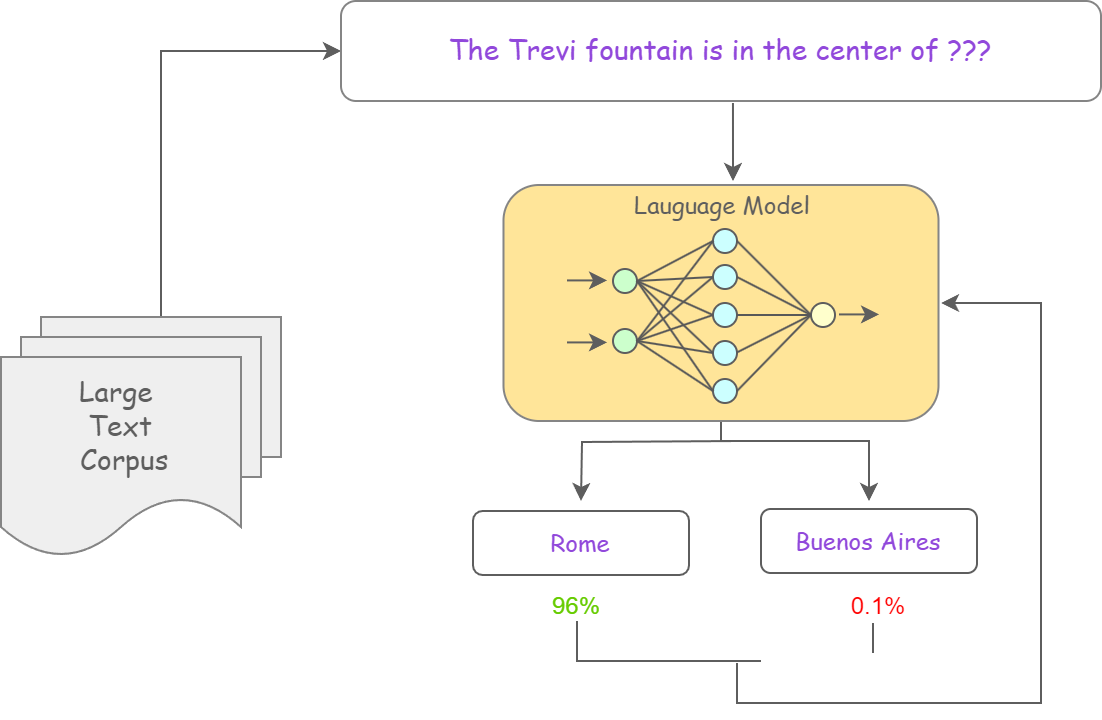

大模型通过对海量文本数据的训练，学习语言中的统计规律和模式。在训练过程中，模型会基于上下文尝试预测下一个词或字符的概率分布，并通过不断调整参数来最小化预测误差。这一过程使模型逐渐掌握语言的语法结构、语义关系以及上下文关联，从而能够生成连贯且符合逻辑的文本。这种能力使大模型能够理解和生成自然语言，完成多种复杂的语言任务。

### 模型结构

大模型的结构通常较为复杂，但一般可以分为以下三个部分：输入层、核心处理层和输出层。当前主流的大模型主要采用Decoder-only（仅解码器）架构，例如 GPT 系列（GPT-1的结构如下图所示），它基于Transformer结构，利用自注意力（Self-Attention）机制来处理输入序列，从而捕捉全局依赖关系并进行文本生成。虽然 BERT也采用了 Transformer 结构，并使用了预训练技术，但它是一个 Encoder-only（仅编码器）模型，主要用于理解任务，而非大规模文本生成，因此通常不严格归类为大模型。

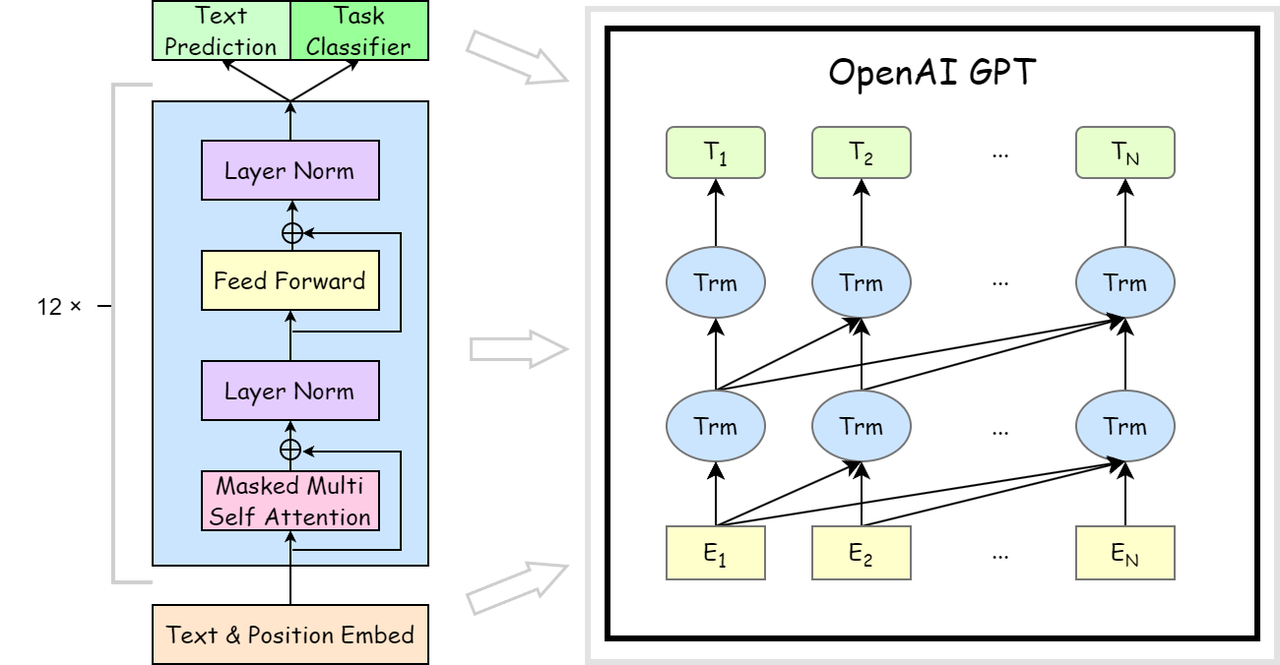

  - 输入层：负责接收用户输入的文本，将其转换为词嵌入（Token Embeddings），并加入位置信息（Positional Encoding），以便模型理解输入序列的顺序。
  - 核心处理层：主要由 Transformer结构组成，包括自注意力机制（Self-Attention）和前馈神经网络（Feed-Forward Network, FFN）。这一层用于深度处理输入数据，捕捉上下文信息，并生成新的表示。
  - 输出层：将核心处理层的结果解码成具体的文本输出，通常是一个 softmax层，用于预测下一个可能的token，逐步生成最终的文本结果。

## 4. 应用的场景

大模型凭借其强大的自然语言处理能力，在多个领域展现出广泛的应用价值。它不仅能够进行文本生成、改写与润色，还能用于智能客服、机器翻译、问答系统等语言理解任务。此外，大模型在个性化推荐、教育、医疗、金融等领域也发挥着重要作用，例如辅助诊断、自动化客户服务、金融分析等。随着技术的发展，大模型的应用场景将持续扩展，为各行业带来更高效、智能的解决方案。相关拓展：[大模型的十大应用场景](https://www.bilibili.com/video/BV1cJUUYNEa3/?spm_id_from=333.337.search-card.all.click)。

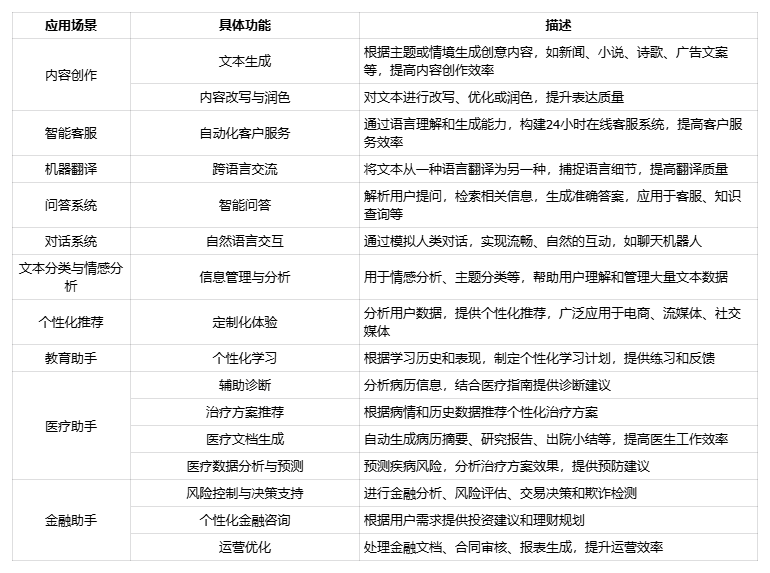

如下视频中，我们可以看到，在对话界面中，用户可以进行AI选股、AI PPT制作、AI编程、AI阅读等多种操作。大模型的出现极大地方便了人们的日常生活。

[相关视频：video/大模型应用演示.mp4](video/大模型应用演示.mp4)

# 从大模型到RAG

## 1. 大模型的局限和挑战

虽然大模型能力非常强，但它依然存在局限性和面临着挑战！以豆包为例，我们在对话框中提出了一个关于航空知识的问题：“颤振分为哪些类型？”，该问题来源于《☆公开☆飞机原理与构造.pdf》文件，标准答案为“机翼的弯扭颤振和副翼的弯曲颤振”。在未上传文件的情况下，模型给出的回答较为宽泛，且未能提供准确答案。然而，上传文件后，再次提问时，模型能够基于文件中的内容，精准地给出正确答案。这表明，大模型在处理特定领域的专业知识和深度时存在一定的局限性。

[相关视频：video/LLM局限性演示.mp4](video/LLM局限性演示.mp4)

然而，在实际应用场景中，文档数量众多，模型能够接受的上下文长度却十分有限。RAG 采用先召回相关信息，再将其提供给大模型的策略，巧妙地解决了这一问题。在深入探讨 RAG 的优势之前，我们需要先深入了解大模型面临的相关挑战。

尽管大模型在多个领域展现了强大的能力，但它仍然存在诸多局限性和挑战。这些问题主要体现在数据质量、技术与性能、应用集成，以及伦理与法律等方面。相关拓展：[GPT4的局限性及总结](https://www.bilibili.com/video/BV1Dc411H7o2/?spm_id_from=333.337.search-card.all.click&vd_source=f35a8115802faa7d5d60efe11a30bf7b)。

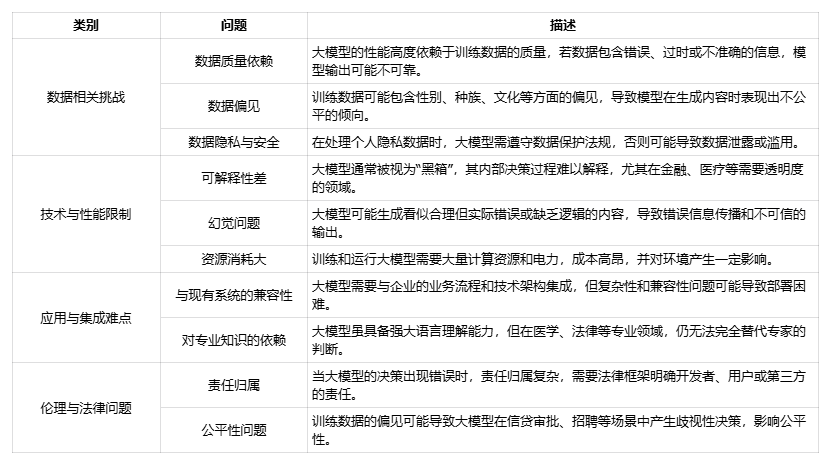

此外，大模型的幻觉问题是其最大挑战之一，指的是模型生成的内容与事实不符、逻辑错乱或违背指令。这种现象主要源于训练数据的局限性、上下文理解的缺陷或模型推理能力的不足。下面简单介绍一下大模型中的幻觉问题。关于幻觉问题的分类，大体上可分为事实性幻觉（Factuality Hallucination）和忠实度幻觉（Faithfulness Hallucination）两种类别。

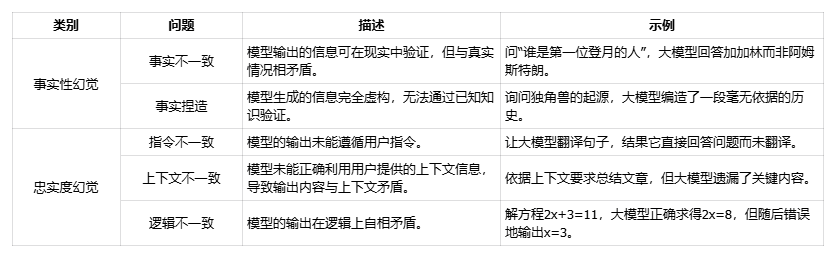

## 2.  RAG 弥补大模型短板     

针对大模型存在的数据依赖性强、幻觉严重等问题，检索增强生成（Retrieval-Augmented Generation , RAG）技术在生成阶段引入了外部知识库，使得大模型的回答基于真实数据，而非仅依赖训练数据推理，从而减少幻觉，提高了信息的准确性。借助RAG技术，大模型在企业应用、专业知识辅助等场景中的表现更加稳定可靠。接下来，我们将深入探讨RAG的基本原理及其相关应用。

我们将从多个维度深入探讨 RAG（检索增强生成）的相关内容。为了大家能够直观地理解大模型与 RAG 之间的关系，不妨把大模型想象成正在参加考试的学生，这个学生平常努力积累知识，能够应对常规题目。但碰上超纲或涉及最新成果的难题，仅靠日常积累就会陷入困境。而 RAG 如同学生考试时能携带的 “神奇书本”，涵盖海量前沿及小众知识，还能实时更新。遇到难题，学生翻开书检索相关内容，结合自身知识，就能给出更准确的答案。换言之，大模型和 RAG 的关系可以概括如下：

- 大模型（学生）：具备一定的知识基础和答题能力，但其知识局限于日常学习积累，面对复杂、新颖的问题时，会因知识储备不足而受限。
- RAG（携带的"神奇"书本）：作为外部知识来源，能为大模型提供丰富且及时更新的知识内容，让大模型在需要时，能够突破自身知识局限，动态获取所需信息。

当大模型面对特定难题或需要最新信息来作答时，RAG 就会发挥作用，从外部数据库或知识库中检索相关内容，提供给大模型。如此一来，大模型便能生成更精准、更具权威性的回答，如同学生借助书本在考试中取得更好的成绩一样，大模型结合 RAG 后，其表现也得到了显著提升。
      
基于上述基于大型语言模型（大模型）生成式和规模大的特点，以及大模型和检索增强生成（RAG）之间的关系，我们可以重新从以下几个方面来直观地理解为什么要用RAG：

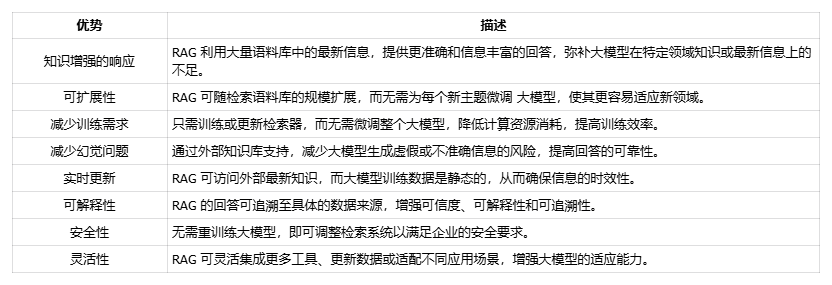

RAG技术与大模型的结合，不仅提高了模型在处理知识密集型任务时的准确性和可靠性，还增强了模型处理最新信息和保护数据安全的能力。这种结合体现了从基础技术到应用技术再到实际应用的逐级深入。接下来将从RAG的基本概念、流程以及常见变种等方面详细介绍RAG。

# RAG 的基本概念

## 1. RAG 的基本流程

RAG（检索增强生成，Retrieval-Augmented Generation）是一种结合信息检索（Retrieval）和文本生成（Generation）的技术，旨在提高大型语言模型（大模型）的准确性和实用性。通过在生成文本前检索外部知识库中的相关信息，RAG 可以让大模型在回答问题时结合最新、最相关的数据，从而减少幻觉现象，并提升答案的专业性和时效性。

### 在线阶段

先来看 RAG 实际运行的关键部分，也就是在线阶段的工作流程。

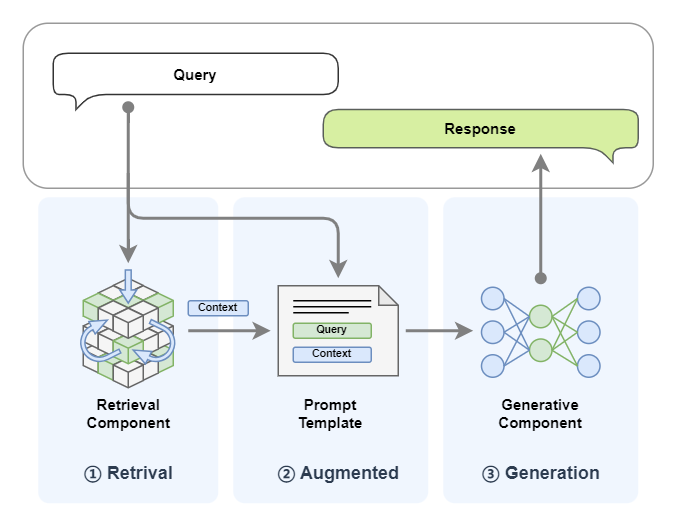

① 检索（Retrieval）

用户输入问题后，系统会基于该输入在外部知识库或向量数据库中检索相关内容。通常使用语义搜索（Semantic Search）或 BM25、Dense Retrieval（DPR）、Embedding-based Retrieval 等技术来匹配最相关的文档片段。

② 增强（Augmented）

检索到的文本内容会作为额外的上下文，与用户输入一起提供给 大模型。这一阶段涉及 Prompt 设计，确保大模型在生成回答时充分利用检索到的信息，而非仅依赖其内部知识。

③ 生成（Generatation）

大模型结合检索到的信息和自身的预训练知识，生成最终的回答。这一过程可能涉及对检索信息的重构、摘要或融合，以确保答案的连贯性、准确性和可读性。
      
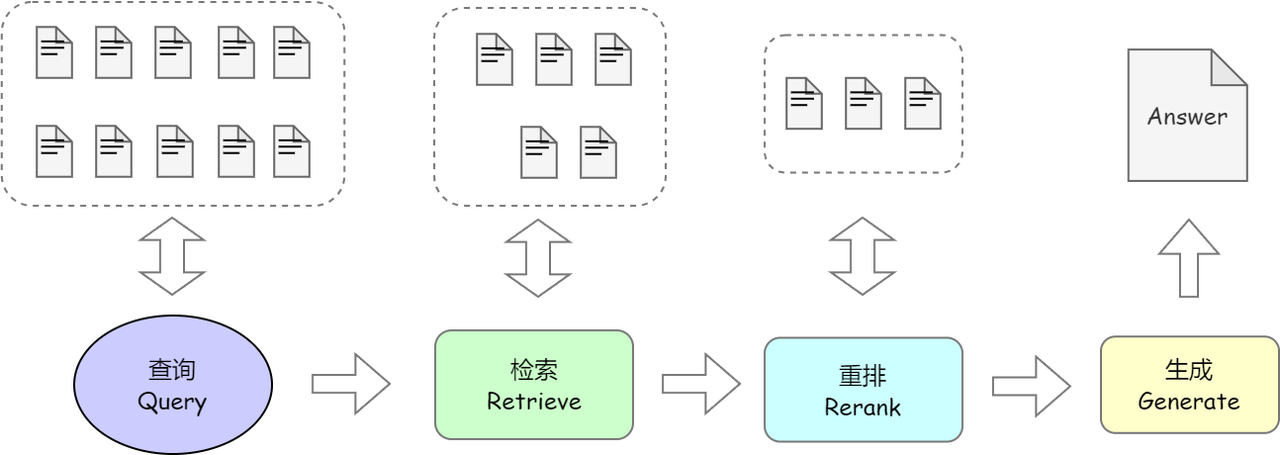

该流程图展示了知识库问答的关键流程：知识库中共有10 个片段，Retrieval 阶段 召回 5 个 相关片段，重排序后筛选出 3 个，最终由大模型结合筛选内容生成回答。整体流程体现了检索增强生成（RAG）的核心思想，即先通过检索获取相关知识并融入Prompt，使大模型参考后生成更合理的回答。相比单纯依赖大模型，RAG 结合`“检索+生成”`，利用向量数据库高效召回知识，并通过大模型生成答案，从而降低幻觉风险，增强知识时效性，并减少微调需求，提升模型的适应能力。

### 文本解析

接下来讲讲文本解析相关内容。为了让 RAG 在线阶段能够顺利运作，前期需要对各种数据进行处理，这其中文档的读取与解析至关重要。在收集数据时，会从各类来源，如文档、数据库、API、网页等，收集大量文本数据，以此构建丰富的知识库。收集来的文档格式多样，有 PDF、Word、Excel、PPT 等，涵盖了不同类型的信息，这使得数据准备工作变得复杂，所以需要有效的文档读取与解析方法来处理这些不同格式的数据。下图是一个简单的PDF文档读取与解析的示例，向我们直观地展示了文档读取与解析的流程。

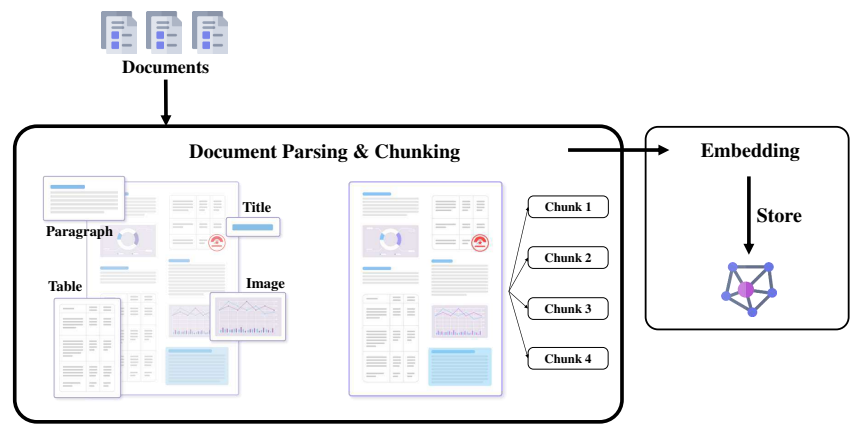

① 文档读取与解析

这是整个流程的基础，决定了系统能否正确提取有价值的信息，为后续检索任务提供结构化的数据。文档读取就是把各种格式的文档加载到系统中，以便后续解析。常见的文档格式包括：

  - PDF文档：使用如PDFMiner、PyPDF2等工具读取文本内容，并通过OCR技术处理扫描文档中的图像。
  - b.Word文档：利用python-docx等工具直接读取标题、段落、列表、表格等元素，将其转化为结构化数据。
  - Excel、PPT等格式：利用专用库（如openpyxl、python-pptx）读取表格和幻灯片内容，并提取出结构化信息。

解析后的文档内容会被转换为统一的 JSON 格式，然后进一步处理和标准化，方便后续构建索引。在文档读取与解析过程中，面对文档格式多样性、内容复杂性和非结构化数据等挑战，可以借助开源工具（如 Apache Tika）、引入 OCR 技术、采用深度学习模型以及构建统一的解析框架等方式，提高解析效率和准确性。

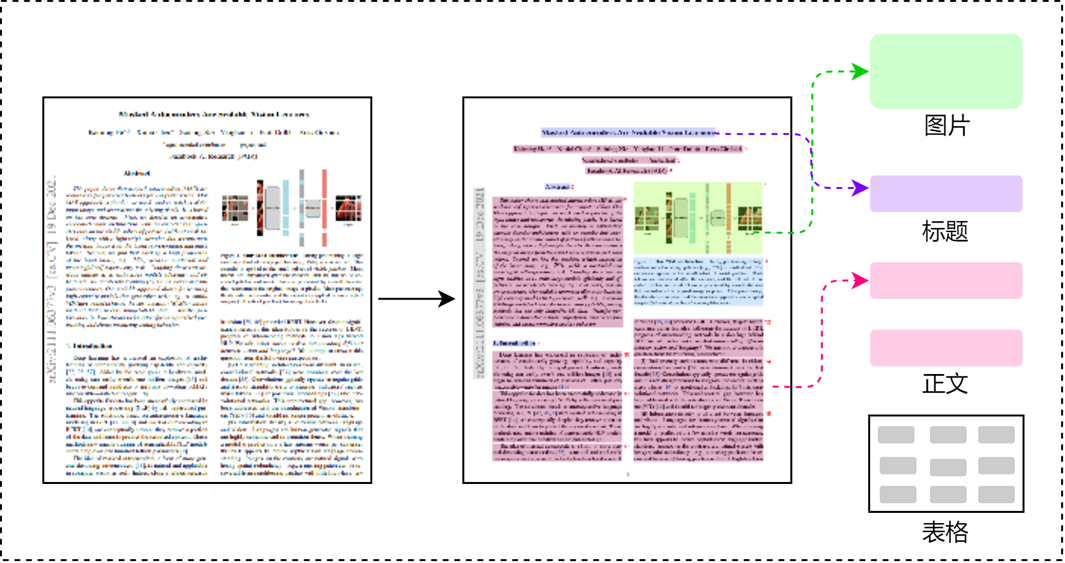

② 预处理

对收集到的原始数据进行清洗、去重、分块等预处理工作，去除无关内容和噪声，确保数据的质量。预处理过程中还需要对文本进行向量化编码，使其能够被高效检索。这一阶段通常使用深度学习模型或其他文本编码方法（如Word2Vec、BERT等）来生成文本的向量表示，便于后续的检索工作。

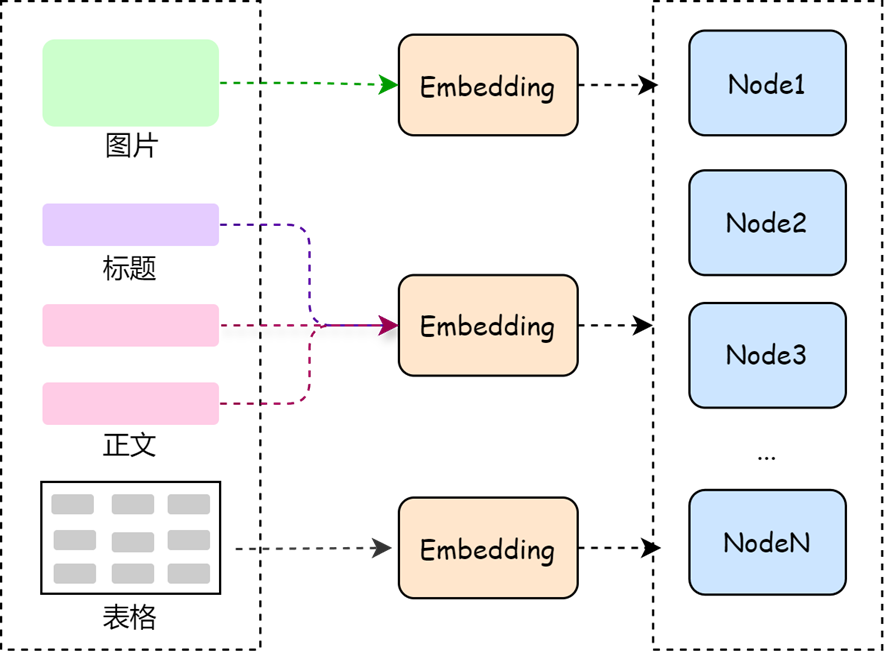

③ 索引构建

利用向量数据库（如FAISS、Weaviate、Pinecone等）或其他高效检索工具，将处理后的文本数据进行索引。这些索引使得后续的检索操作能够高效快速地找到与用户查询相关的文档片段。文档解析后的信息会被索引系统存储，并且定期更新，以保持信息的时效性。

④ 存储优化

确保存储的文本能够支持高效查询，优化存储系统的架构，提高数据访问速度。在存储优化的过程中，除了考虑文本数据的检索效率外，还需要关注存储系统的可扩展性，以便适应日后数据量的增加。

## 2. 不同类型的 RAG

### Naive RAG

RAG技术的基础版本，用于结合检索和生成来处理复杂的任务，比如问答或内容生成。

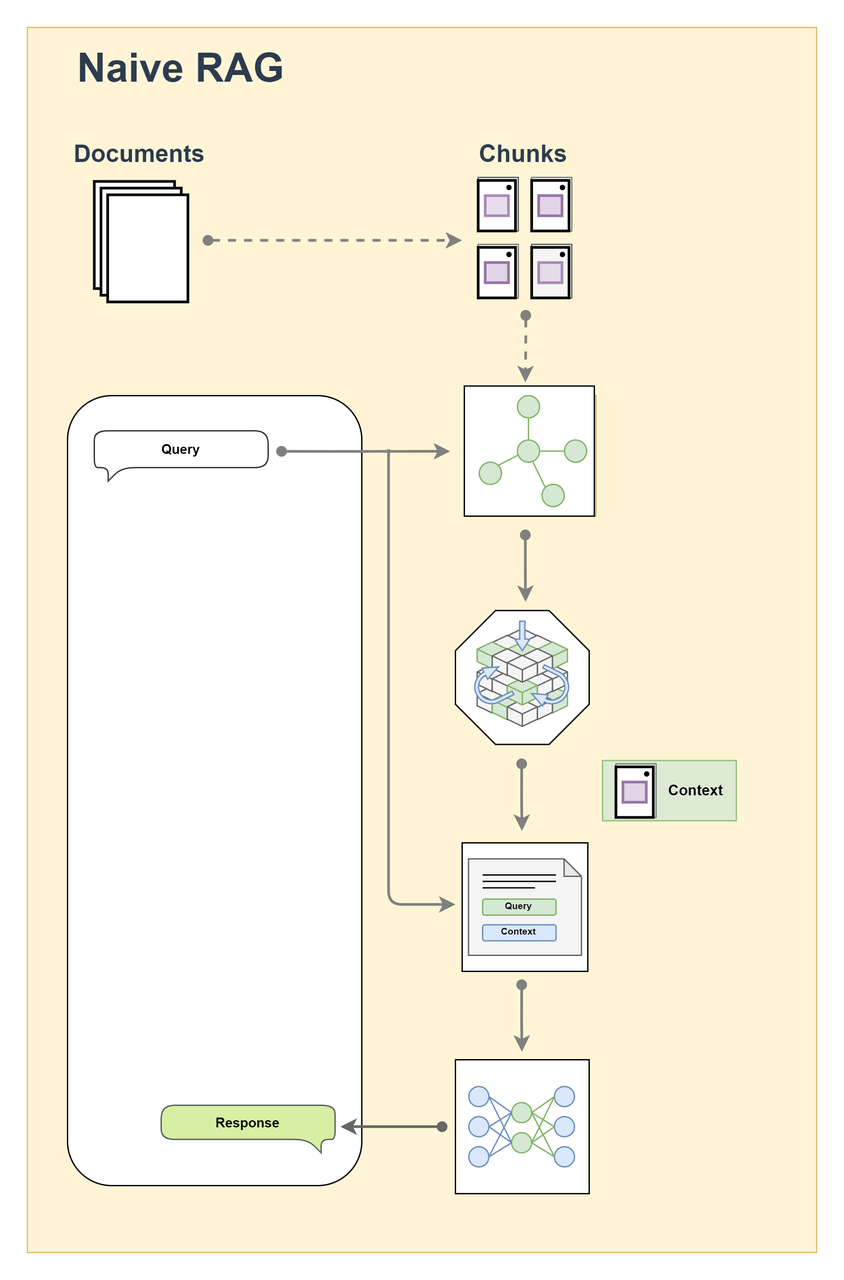

**流程：**

用户输入一个查询 ➝ 检索模块从知识库中找出与查询相关的文档片段 ➝ 将检索结果连同查询一起传递给生成模块 ➝ 生成模块基于上下文生成回答或内容

**优点：**

a.简单高效：由于模块化设计，容易实现和调试。

b.可扩展性强：检索模块和生成模块可以独立优化或替换。

**应用场景：**

a.文档问答：基于企业内部文档或外部知识库回答用户提问。

b.内容生成：辅助生成新闻、摘要等需要结合外部信息的内容。

### Retrieve-and-rerank RAG

基础 RAG 架构的增强版本，通过引入重排序（Reranking）步骤，更好地筛选检索结果，提高传递给生成模块（Generator）上下文的质量。其中，在重排序阶段中会使用更强的模型（如 Transformer-based 模型），对初步检索的结果重新评估，并按照与查询的相关性排序，从而选出最有价值的文本供大模型使用。

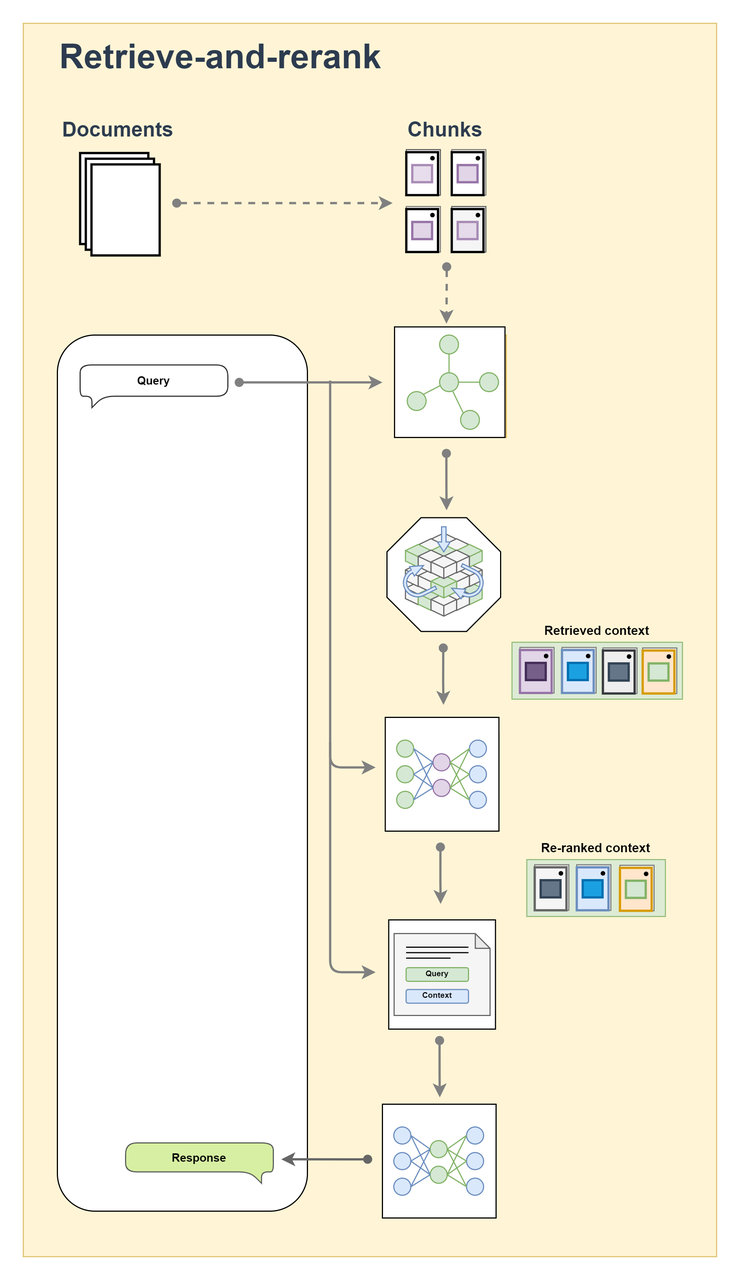

**流程：**

用户输入一个查询 ➝ 检索模块从知识库中找到一批初步相关的文档（向量检索） ➝ 对检索到的文档进行重排序，以筛选最相关的信息 ➝ 生成模块使用重排序后的文档作为上下文，生成最终回答。

**优点：**

a.提升检索精度：初步检索模块通常快速但粗略，重排序能更精准地选择最相关的文档。

b.减少生成错误：提供高相关性上下文，避免生成模块在不相关或错误信息基础上生成答案。

c.适配长尾查询：对于少见或复杂的查询，重排序能进一步优化初步检索效果。

**应用场景：**

a.推荐系统：在搜索和推荐场景中，重排序步骤可以显著提高最终推荐内容的相关性和用户满意度。

b.技术支持：从文档中筛选最相关的答案，减少生成模块的错误回答率。

### Multimodal RAG

该模型与Naive RAG 类似，由检索模块和生成模块组成，但增加了对多模态数据的支持。

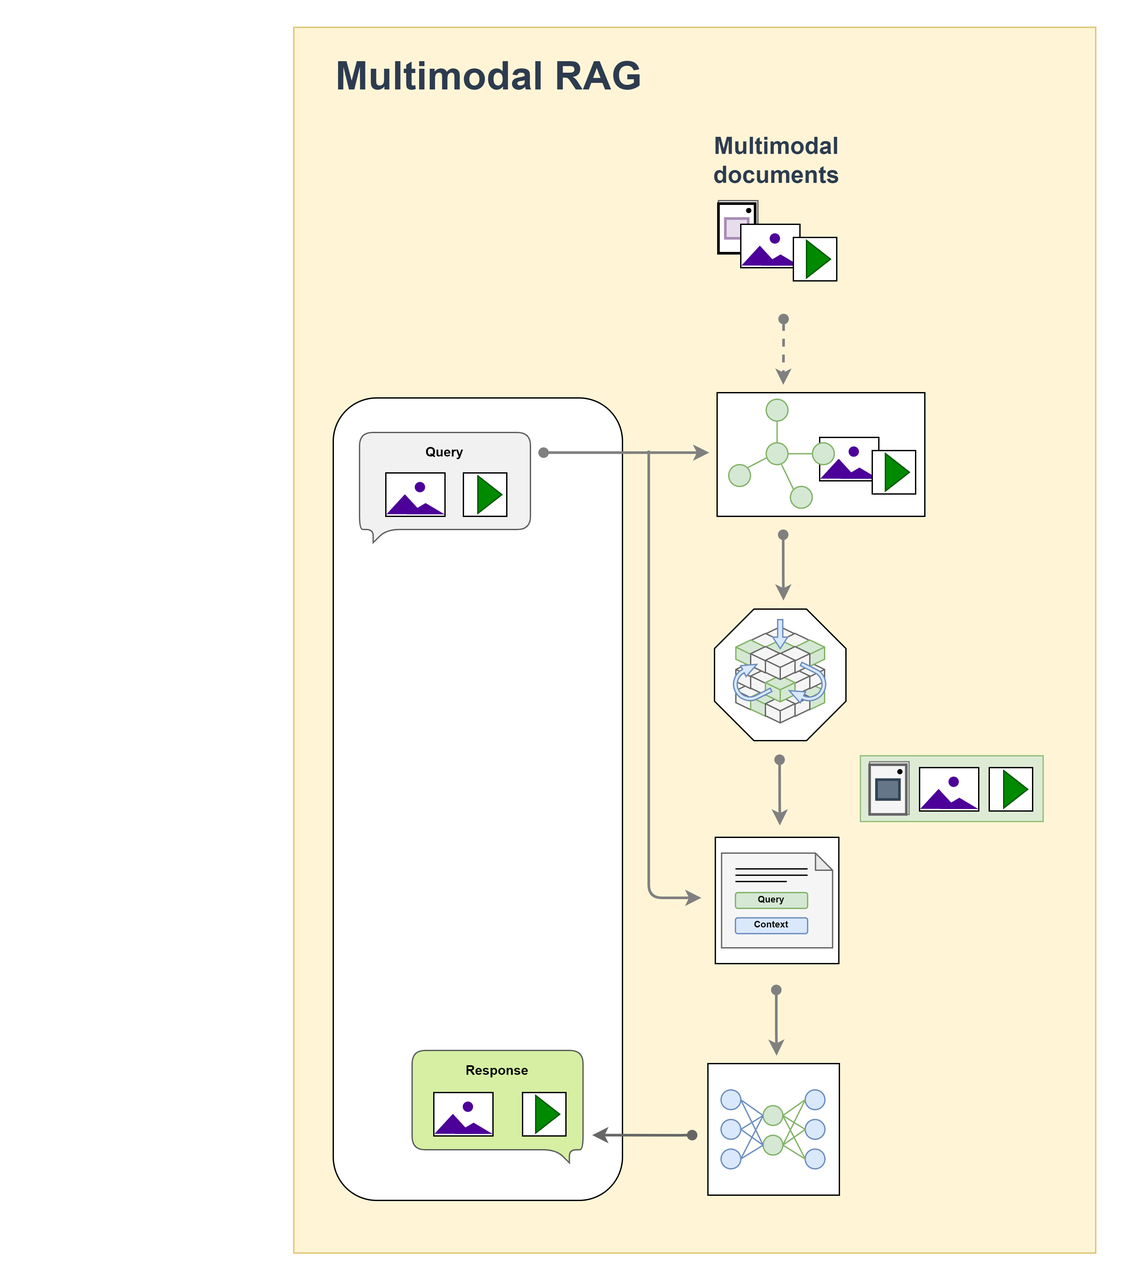

**流程：**

用户输入可以是文本或其他模态（图像等） ➝ 多模态检索模块找到与输入相关的多模态上下文 ➝ 将检索结果传递给生成模块 ➝ 结合上下文信息生成多模态回答。

**优点：**

a.支持多种输入类型：除文本问题外，还能处理图像、视频等相关的查询。

b.增强的上下文理解：将文本、图像等模态上下文结合起来，生成更准确、更有深度的内容。

**应用场景：**

a.医疗诊断：结合医学文本和影像数据，生成诊断报告或建议。

b.内容生成：从视频或音频中提取关键信息并生成摘要或分析报告。

c.图像描述生成：为图像生成自然语言描述，适用于教育或辅助工具。

### Graph RAG

该模型是对基础 RAG 架构的一种扩展，通过引入图数据库来增强知识点之间的关联和文档间关系的理解。

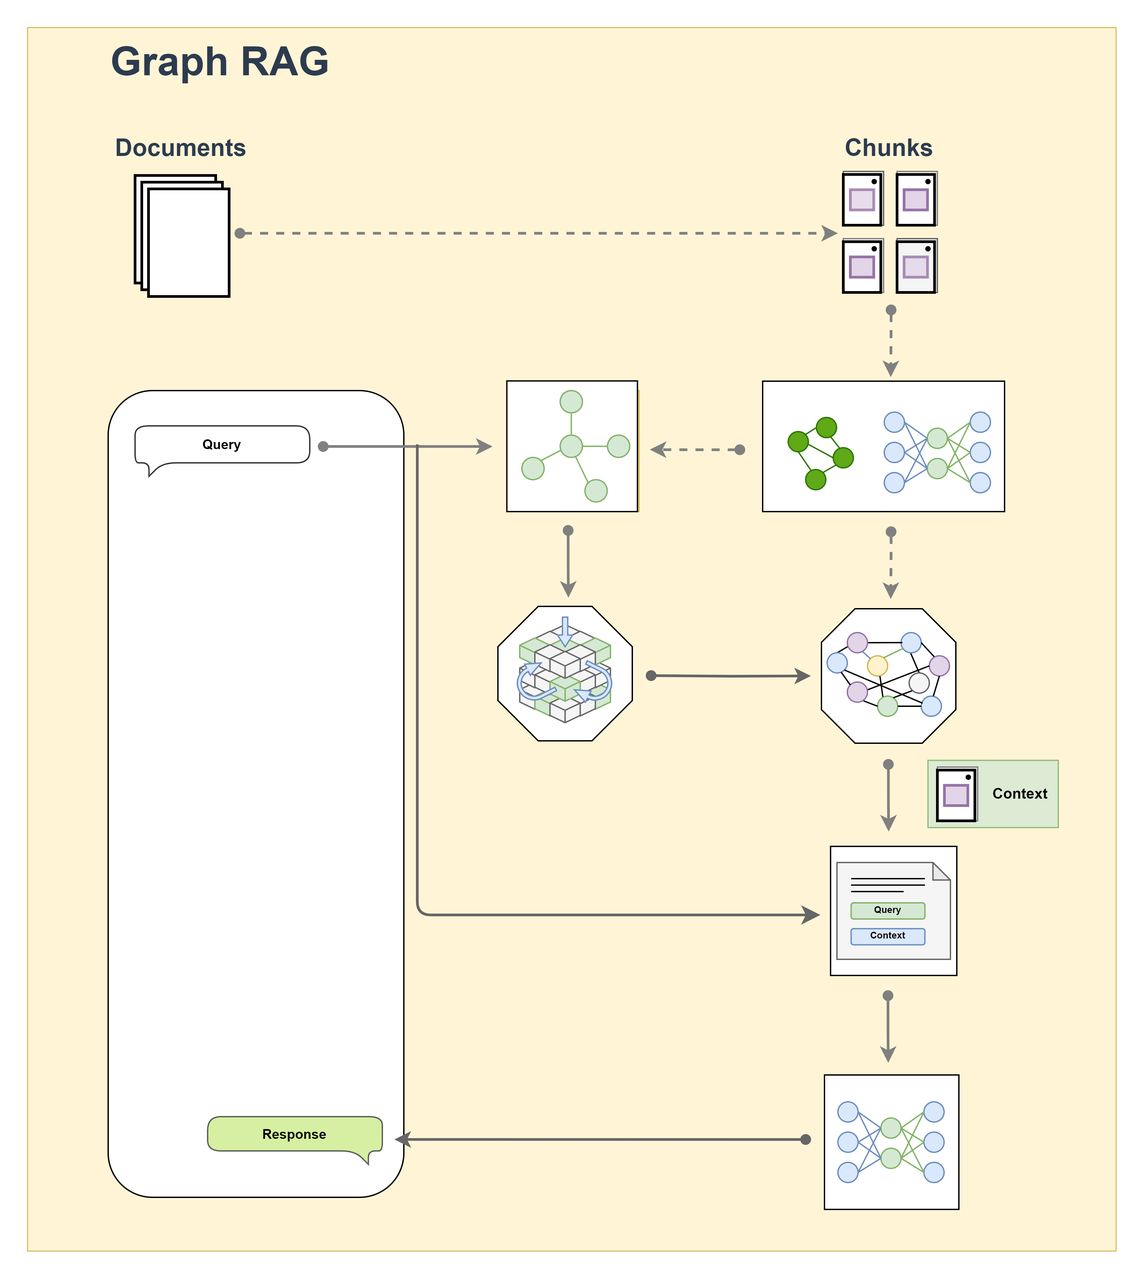

**流程：**

知识建模（从知识库或文档集合中提取实体、关系和文本内容，构建图数据库） ➝ 用户查询（用户输入问题，将查询转换为图查询） ➝ 检索与用户问题相关的子图 ➝ 上下文扩展（将检索到的子图中的信息转化为文本上下文，并传递给生成模块） ➝ 内容生成。

**优点：**

a.知识点间关系的深度挖掘：通过图结构，捕捉文档或知识点之间的复杂关系（如层次关系、因果关系等），提高检索结果的质量。

b.上下文的精准扩展：在检索阶段，图数据库可以帮助找到更相关的上下文，而不仅仅依赖向量相似性。

c.增强推理能力：利用图的结构化数据，可以进行关系推理，例如多跳检索（从一个节点找到间接相关的节点）。

d.动态更新与维护：图数据库支持动态更新，易于在知识库扩展时维护新数据的关系。

**应用场景：**

a.复杂问答和推理问题：需要跨文档或跨实体推理的问答任务，如法律问答或科技文献分析。

b.知识管理：在企业或科研机构中，利用图数据库管理和查询大量关联文档或研究成果。

### Hybrid RAG

这是一种结合了多种检索方法和生成方式的架构，旨在优化检索的覆盖率和生成的准确性。

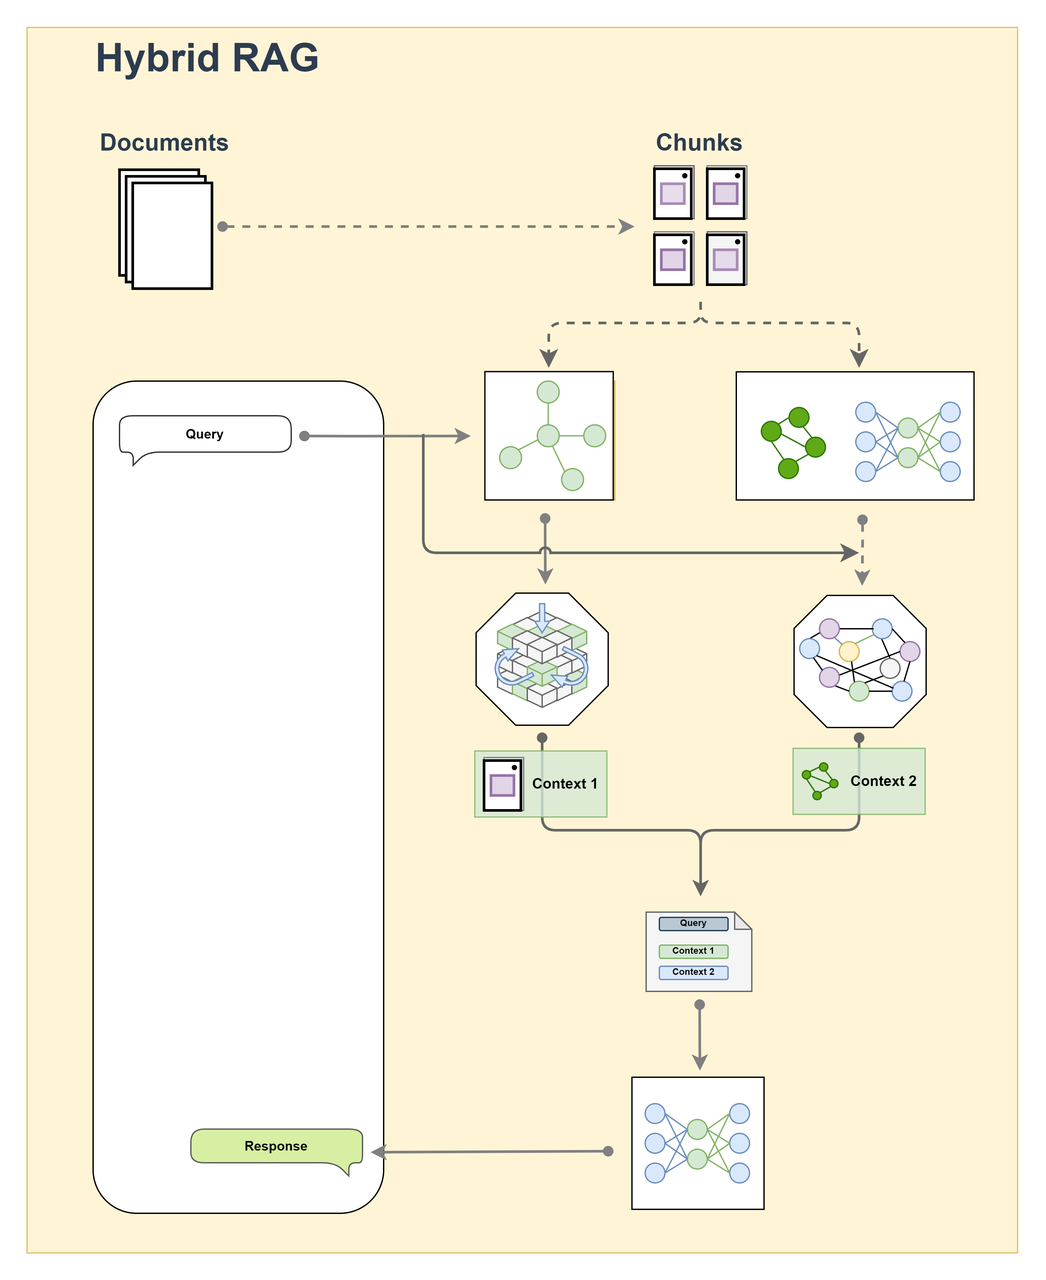

**流程：**

输入处理（用户提出查询后，系统首先对输入的查询进行预处理） ➝ 向量检索＋图检索 ➝ 将向量检索和图检索的结果进行融合 ➝ 增强提示构建（构建一个增强的提示，结合用户的查询和检索到的信息，同时这个提示将被用作生成模型的输入） ➝ 内容生成。

**优点：**

a.高检索覆盖率：结合了向量检索和图检索，提高了检索的覆盖率和准确性。

b.增强上下文关联性：通过整合不同检索系统的结果，更深入地理解实体间的关系及其出现的上下文，增强了内容关联性。

c.动态推理能力：知识图谱可以动态更新，使系统能够适应新信息的可用性，增强了系统的推理能力。

**应用场景：**

a.问答系统：Hybrid RAG可以用于构建问答系统，能够理解用户的查询，从文档中检索信息，并生成准确和详细的答案。这种系统特别适用于需要准确信息检索和生成的场合，如在线帮助中心、客户服务等。

b.对话系统：在对话系统中，Hybrid RAG可以生成更自然、更相关的回复，提高用户体验。这对于聊天机器人和虚拟助手等应用尤为重要，它们需要提供信息丰富且连贯的对话。

c.文档生成：Hybrid RAG可以利用检索到的信息和知识图谱的结构化数据来创建内容丰富、逻辑清晰的文档，适用于报告生成、内容创作等领域。

d.内容推荐：Hybrid RAG可以分析用户的兴趣和偏好，检索和生成推荐内容，提高推荐的个性化和准确性。这对于新闻推荐、电商产品推荐等场景非常有用。

e.复杂问答：需要跨文档或跨实体推理的问答任务，如法律问答或科技文献分析，Hybrid RAG能够提供更准确的答案，同时保持对话的自然流畅。

### Agentic RAG

一种更高级的 Retrieval-Augmented Generation (RAG) 架构，通过引入AI Agent 作为路由器，根据用户的查询动态选择最合适的处理路径或模块。它在复杂、多任务场景中具有明显优势，因为不同查询可能需要不同的数据源或处理逻辑。

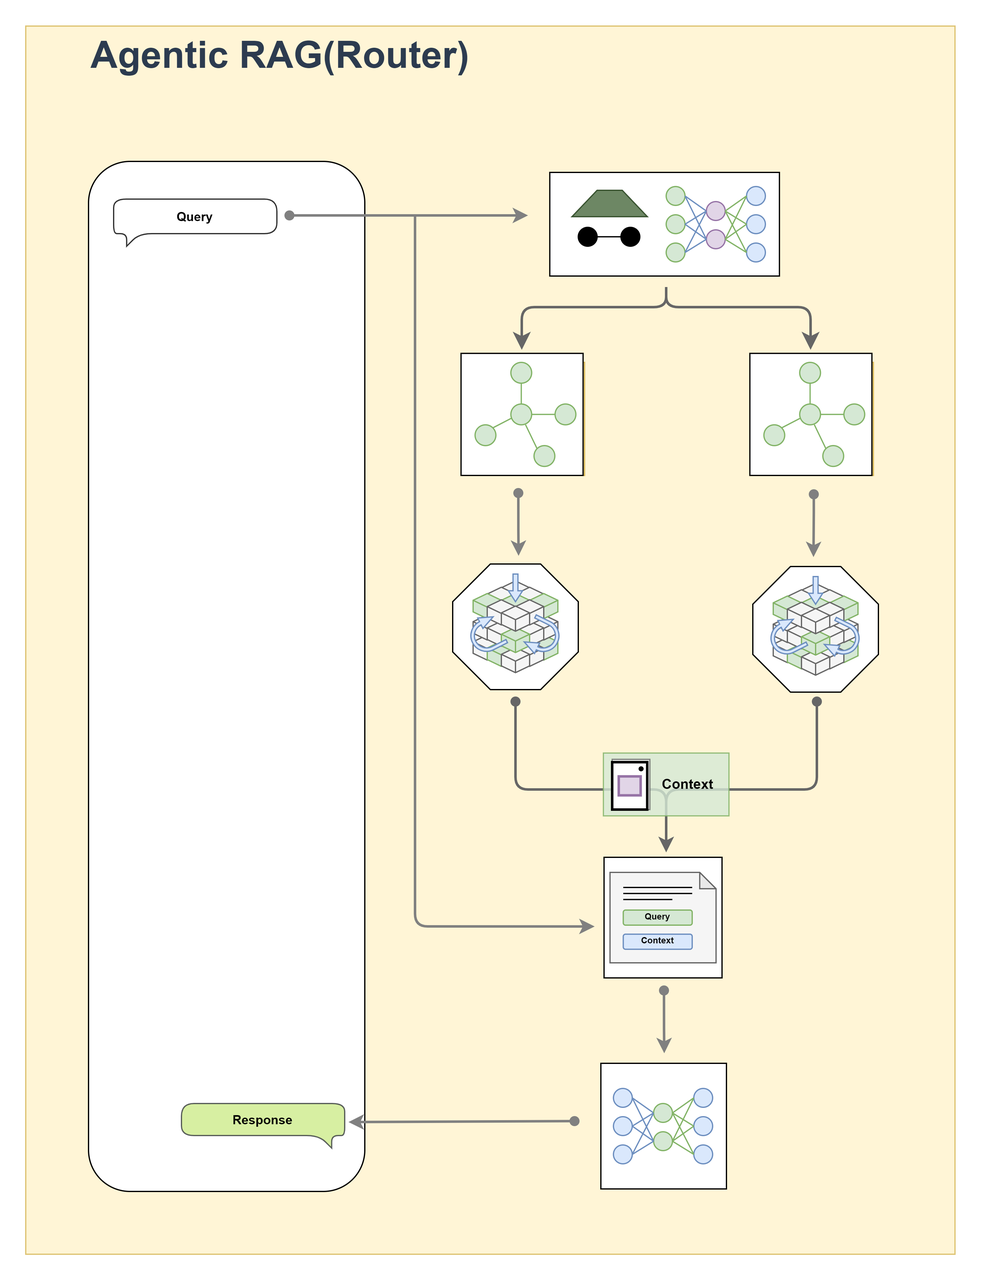

**流程：**

用户输入问题或任务描述 ➝ Router分析查询的意图和模态 ➝ 模块选择（调用文本、图像检索模块，或同时调用多模态检索模块） ➝ 内容生成。

**优点：**

a.查询分析与智能重构：Agentic RAG能够精细分析和重构原始用户查询，将模糊或复杂的查询转化为更精确、可检索的形式，并智能路由判断是否需要额外的数据源来全面回答问题。

b.多源数据检索：能够灵活地从多个数据源检索信息，包括实时用户数据、内部文档和外部数据源，打破信息孤岛，提供更全面的答案。

c.动态答案生成与优化：Agentic RAG不满足于仅仅给出一个答案，而是通过多轮迭代不断优化，生成多个候选答案并评估每个答案的准确性和相关性，必要时重新查询或调整生成策略。

**应用场景：**

a.医疗辅助：动态调用医学图像分析模块、文献检索模块或诊断生成模块。

b.教育内容生成：根据学生的问题选择合适的资料来源并生成解释。

c.自动化工作流：处理复杂查询时，调用外部工具（如计算器、翻译器、编程执行器）完成多步骤任务。

### Agentic RAG Multi-Agent

Agentic RAG Multi-Agent 是一种利用多个专门 AI Agent 协同工作的架构，它可以调用不同的工具（如向量搜索、网页搜索、Slack、Gmail 等），以处理复杂的、多源数据环境中的任务。

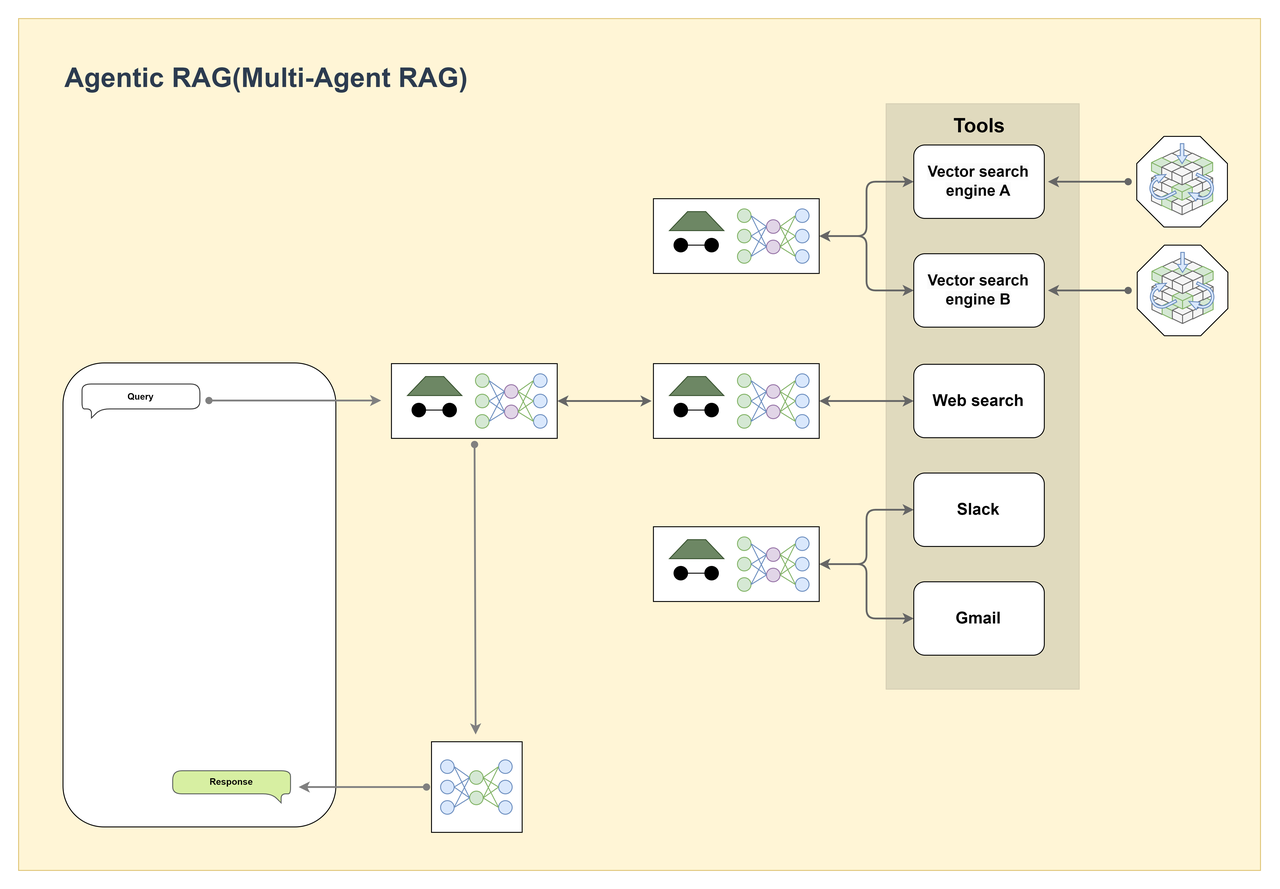

**流程：**

用户提出一个复杂的请求 ➝ 主控Agent将任务分解为子任务 ➝ 主控Agent将子任务分派给相关专用Agent，按优先级并行处理 ➝ 专用Agent调用相应工具或接口完成任务，返回结果 ➝ 主控Agent收集所有Agent的结果，整合为用户可以理解的输出内容。

**优点：**

a.模块化设计：各 Agent 独立工作，便于扩展和优化。

b.多任务并行处理：多个 Agent 可并行运行，大幅提高复杂任务的处理效率。

c.工具支持广泛：能调用多种工具和 API，覆盖从数据检索到内容生成、任务执行等全流程。

d.动态任务适配：主控 Agent 可根据任务动态调整执行路径和 Agent 调用顺序。

e.复杂任务自动化：能自动化执行跨工具、跨数据源的多步骤任务，例如从检索数据到生成报告并发送通知。

f.提高响应准确性和可靠性：Agentic RAG在检索过程中能够实时评估所获取数据的质量，并在生成响应后进行后续检查。

g.良好的可扩展性和灵活性：Agentic RAG的模块化设计使其具备良好的可扩展性，能够随着组织需求的增长轻松集成新的数据源和工具。

**应用场景：**

a.实时数据分析：从网页和内部数据库中收集实时数据，生成趋势分析报告。

b.复杂客户支持：检索 FAQ、结合网页搜索和实时工具调用，为用户提供高质量的支持。

c.内容创作与分发：从向量数据库中检索素材，生成文章或报告，并分发至邮箱或内容管理系统。

# 后续教程大纲

在本节中，我们探讨了大模型的局限性以及RAG技术如何通过结合检索与生成来突破这些限制。RAG不仅能够动态获取最新知识，还能在生成过程中融入上下文信息，显著提升了模型的实用性和准确性。然而，这仅仅是RAG技术的起点。在接下来的教程中，我们将深入实战，从最基础的RAG实现开始，逐步探索如何优化召回效果、提升系统性能，甚至处理多模态数据（如图片和表格）。你还将学习如何构建企业级RAG系统，解决复杂的统计问题，并了解高阶技术如Graph RAG和Agentic RAG的应用。无论你是初学者还是进阶开发者，这些内容都将为你打开一扇通往更智能、更高效语言模型应用的大门。让我们继续探索，解锁RAG的无限潜力！！！

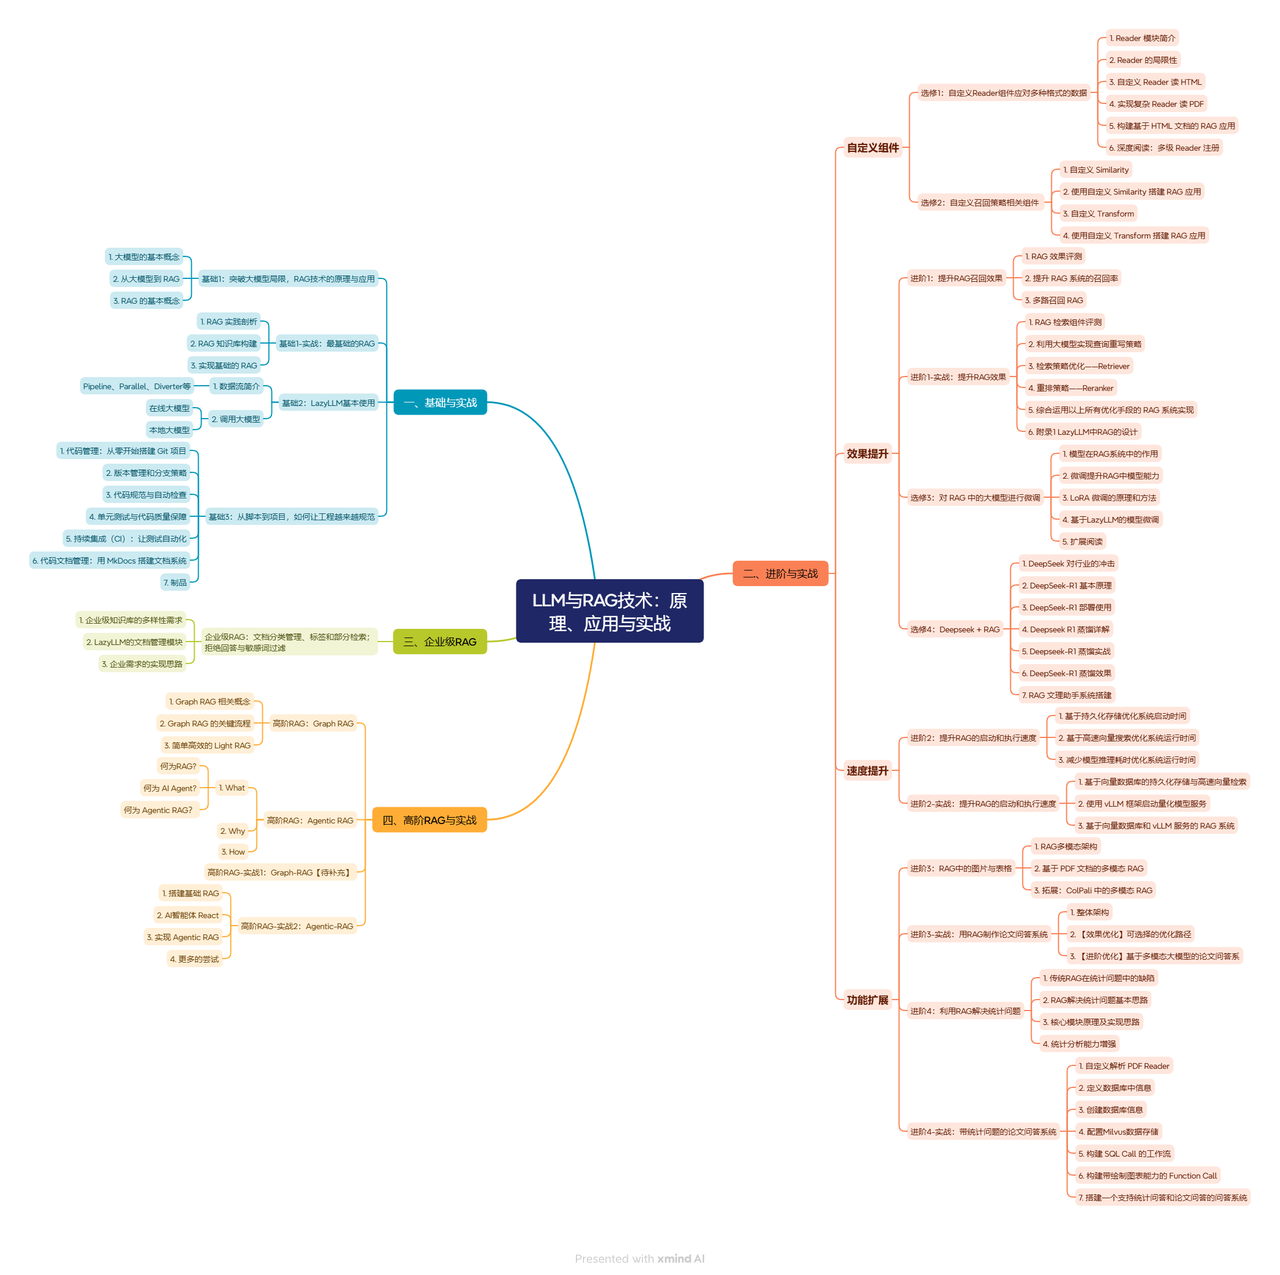

